## RIGOL Screenshot Tool

## Imports

In [70]:
import matplotlib.pyplot as plt
from datetime import datetime

from ds1054z import DS1054Z
from matplotlib.ticker import FormatStrFormatter
from IPython.display import Image, display


## Configurations

In [90]:
DS1054Z_IP = "10.153.82.107"

path_to_figures = "/home/brotzer/Pictures/oszi_captures/"

vertical_scale = 1.0  ## Volts
horizontal_scale = 0.002  ## Seconds


## Scope Settings

In [91]:
scope = DS1054Z(DS1054Z_IP) ## initiate scope object

scope.run()  ## activate scope

scope.set_probe_ratio(1, 1)

scope.set_channel_scale(1, vertical_scale) ## channel number, volts

scope.timebase_scale = horizontal_scale ## time axis in seconds

In [92]:
## take a screenshot
bmap_scope = scope.display_data

## display the screentshot
screenshot = Image(bmap_scope)

## saving screenshot
with open(path_to_figures+f"RIGOL_screenshot_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png", "wb") as png:
    print(f" -> saving screenshot to: {path_to_figures}RIGOL_screenshot_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")
    png.write(bmap_scope)

## show screenshot    
display(screenshot)


 -> saving screenshot to: /home/brotzer/Pictures/oszi_captures/RIGOL_screenshot_20221028_140221.png


42472

In [127]:
def __get_oscilloscope_data(scope):
    
    data = {}
    
    ## avoid changing buffer
    scope.stop()
    
    data['ch1'] = scope.get_waveform_samples(1, mode='RAW')
    data['ch2'] = scope.get_waveform_samples(2, mode='RAW')
    data['ch3'] = scope.get_waveform_samples(3, mode='RAW')
    data['ch4'] = scope.get_waveform_samples(4, mode='RAW')
    
    
#     data['npts'] = scope.memory_depth_curr_waveform
#     data['sampling_rate'] = data['npts']/(12.0 * d_timebase_scale_actual)
    data['npts'] = scope.memory_depth_internal_currently_shown
    data['sampling_rate'] = float(scope.query(":ACQuire:SRATe?"))
    data['timeline'] = np.linspace(0,(data['npts']-1),data['npts'])/data['sampling_rate']
    
    ## reset to acquisition
    scope.run()
    
    return data

In [128]:
dat = __get_oscilloscope_data(scope)

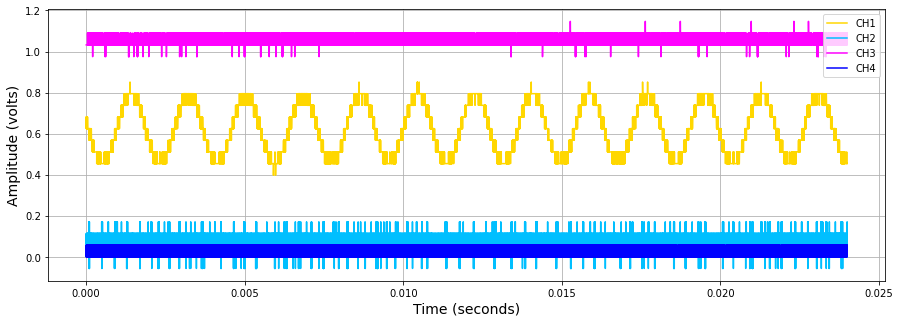

In [129]:
fig, ax = plt.subplots(1,1 , figsize=(15,5))

font = 14

ax.plot(dat['timeline'], dat['ch1'], label="CH1", color="gold")
ax.plot(dat['timeline'], dat['ch2'], label="CH2", color="deepskyblue")
ax.plot(dat['timeline'], dat['ch3'], label="CH3", color="magenta")
ax.plot(dat['timeline'], dat['ch4'], label="CH4", color="blue")

ax.set_xlabel("Time (seconds)", fontsize=font)
ax.set_ylabel("Amplitude (volts)", fontsize=font)

ax.grid()
ax.legend(loc=1)

plt.show();

In [130]:
from scipy.fft import rfft, rfftfreq

In [131]:
cx_y_raw = rfft(dat['ch1'])/float(dat['npts']/2.)
d_ws_raw = rfftfreq(dat['npts'],1./dat['sampling_rate'])

<Figure size 1152x288 with 0 Axes>

Text(0.5, 0, 'Frequency, hertz')

(200.0, 600.0)

Text(0, 0.5, 'Amplitude, -')

Text(0.5, 1.0, 'Signal spectrum (RAW)')

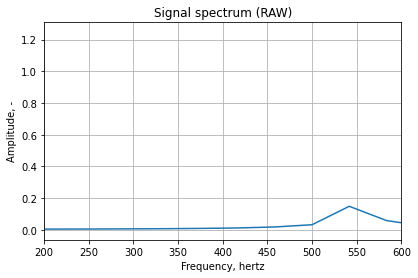

In [136]:
plt.figure()
plt.plot(d_ws_raw, abs(cx_y_raw))
plt.grid()
plt.xlabel('Frequency, hertz')
plt.xlim([200, 600])
plt.ylabel('Amplitude, -')
plt.title('Signal spectrum (RAW)')
figure = plt.gcf()
figure.set_size_inches(4*1.6, 4)
plt.savefig('Spectrum_Raw.pdf')